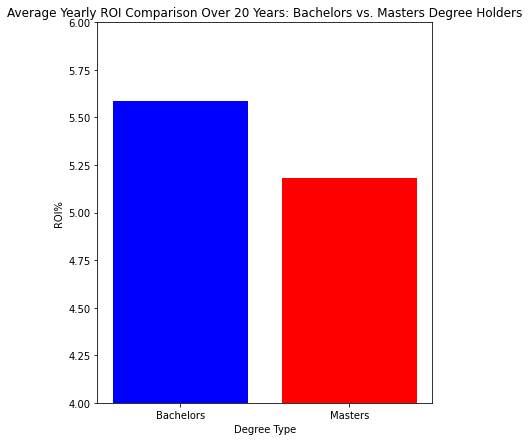

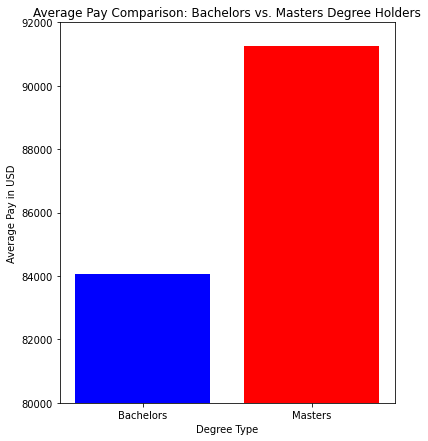

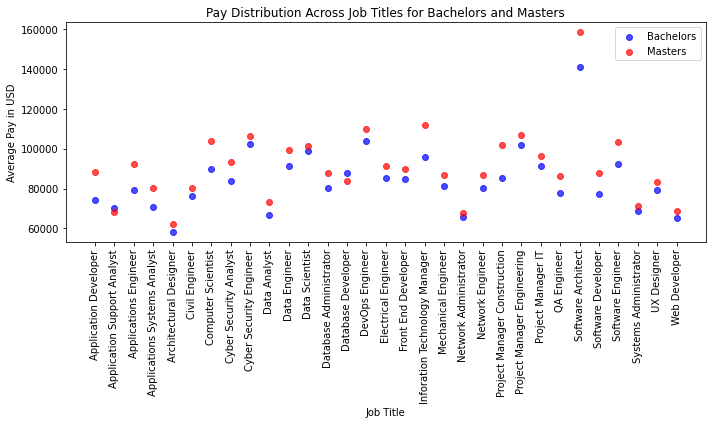

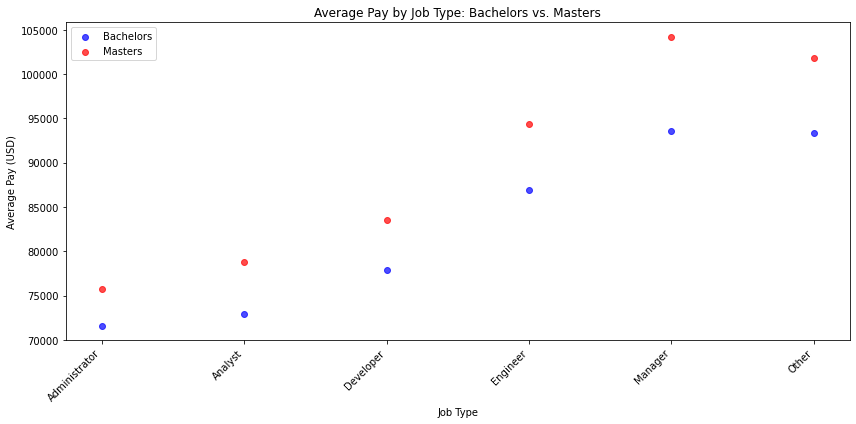

In [33]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt('data.csv', delimiter=',', dtype=str, skip_header=1)

degree_types = data[:, 0]
job_titles = data[:, 1]
job_types = data[:, 3]
averages = data[:, 2].astype(float)

labels = ['Bachelors', 'Masters']

bachelors_avg = averages[degree_types == 'Bachelors'].mean() 
masters_avg = averages[degree_types == 'Masters'].mean() 
average_pay = [bachelors_avg, masters_avg] 

#ROI Calculations with WIT cost of attendance
# WIT cost of attendance is $56,750 / year

#Bachelors
total_cost = 255352
earnings = (bachelors_avg * 20)
broi = ((earnings - total_cost) / total_cost)

#Masters is calculated with Bachelors + $40,000 for masters fees

#Masters
total_cost = 295352
earnings = (masters_avg * 20)
mroi = ((earnings - total_cost) / total_cost)

#Bar Chart for ROI
roi = [broi, mroi]

plt.figure(figsize=(6,7))
plt.ylim(4, 6)
plt.bar(labels, roi, color=['blue', 'red'])
plt.xlabel('Degree Type')
plt.ylabel('ROI%')
plt.title('Average Yearly ROI Comparison Over 20 Years: Bachelors vs. Masters Degree Holders')
plt.show()

#Bar Chart
plt.figure(figsize=(6, 7))
plt.ylim(80000, 92000)
plt.bar(labels, average_pay, color=['blue', 'red'])
plt.xlabel('Degree Type')
plt.ylabel('Average Pay in USD')
plt.title('Average Pay Comparison: Bachelors vs. Masters Degree Holders')
plt.show()

#Scatterplot
plt.figure(figsize=(10, 6))

unique_jobs = np.unique(job_titles)
job_mapping = {job: idx for idx, job in enumerate(unique_jobs)}
x_positions = np.array([job_mapping[job] for job in job_titles])

bachelors_mask = degree_types == 'Bachelors'
plt.scatter(
    x_positions[bachelors_mask],      
    averages[bachelors_mask],         
    color='blue', label='Bachelors', alpha=0.7
)

masters_mask = degree_types == 'Masters'
plt.scatter(
    x_positions[masters_mask],        
    averages[masters_mask],           
    color='red', label='Masters', alpha=0.7
)

plt.xticks(range(len(unique_jobs)), unique_jobs, rotation=90)  
plt.xlabel('Job Title')
plt.ylabel('Average Pay in USD')
plt.title('Pay Distribution Across Job Titles for Bachelors and Masters')
plt.legend()
    
plt.tight_layout()
plt.show()

#group pay scatterplot
b_type_pay = {}
m_type_pay = {}

def calculate_avg_pay(degree_filter, degree_type):
    degree_mask = degree_types == degree_type
    filtered_job_types = job_types[degree_mask]
    filtered_averages = averages[degree_mask]
    type_pay = {}
    for job_type in np.unique(filtered_job_types):
        type_mask = filtered_job_types == job_type
        avg_pay = filtered_averages[type_mask].mean()
        type_pay[job_type] = avg_pay
    return type_pay

b_type_pay = calculate_avg_pay(degree_types, "Bachelors")
m_type_pay = calculate_avg_pay(degree_types, "Masters")

b_job_types = list(b_type_pay.keys())
b_avg_pays = list(b_type_pay.values())

m_job_types = list(m_type_pay.keys())
m_avg_pays = list(m_type_pay.values())

all_job_types = sorted(set(b_job_types + m_job_types))
x_positions = np.arange(len(all_job_types))

b_x = [x_positions[all_job_types.index(job)] for job in b_job_types]
m_x = [x_positions[all_job_types.index(job)] for job in m_job_types]

plt.figure(figsize=(12, 6))

plt.scatter(b_x, b_avg_pays, color='blue', label='Bachelors', alpha=0.7)
plt.scatter(m_x, m_avg_pays, color='red', label='Masters', alpha=0.7)

plt.xticks(x_positions, all_job_types, rotation=45, ha='right')  
plt.xlabel('Job Type')
plt.ylabel('Average Pay (USD)')
plt.title('Average Pay by Job Type: Bachelors vs. Masters')
plt.legend()
plt.tight_layout()
plt.show()
